In [66]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math 

In [67]:
# Carga los archivos de datos en diferentes DataFrames
df_calls= pd.read_csv('megaline_calls.csv')
df_internet= pd.read_csv('megaline_internet.csv')
df_messages= pd.read_csv('megaline_messages.csv')
df_plans= pd.read_csv('megaline_plans.csv')
df_users= pd.read_csv('megaline_users.csv')

In [68]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [69]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [109]:
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   month       500 non-null    period[M]     
dtypes: datetime64[ns](2), int64(2), object(4), period[M](1)
memory usage: 35.3+ KB
None


In [71]:
print(df_users.head(5))
print()
print(df_users.isna().count)
print()
print(df_users.columns)

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

<bound method DataFrame.count of      user_id  first_name  last_name    age   city  reg_date   plan  churn_date
0      False       False      False  False  False     False  False        True
1      False       False      False  False  False     False  False        True
2      False       False  

In [72]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='coerce')

### Enriquecer los datos

In [73]:
df_users['month'] = df_users['reg_date'].dt.to_period('M')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   month       500 non-null    period[M]     
dtypes: datetime64[ns](2), int64(2), object(4), period[M](1)
memory usage: 35.3+ KB


## Llamadas

In [74]:
df_calls.info()
print()
print(df_calls['duration'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64


In [75]:
print(df_calls.head(20))
print()
print(df_calls.columns)
print()
print(df_calls.duplicated().sum())
print()
print(df_calls.isna().sum())

          id  user_id   call_date  duration
0    1000_93     1000  2018-12-27      8.52
1   1000_145     1000  2018-12-27     13.66
2   1000_247     1000  2018-12-27     14.48
3   1000_309     1000  2018-12-28      5.76
4   1000_380     1000  2018-12-30      4.22
5   1000_388     1000  2018-12-31      2.20
6   1000_510     1000  2018-12-27      5.75
7   1000_521     1000  2018-12-28     14.18
8   1000_530     1000  2018-12-28      5.77
9   1000_544     1000  2018-12-26      4.40
10  1000_693     1000  2018-12-31      4.31
11  1000_705     1000  2018-12-31     12.78
12  1000_735     1000  2018-12-29      1.70
13  1000_778     1000  2018-12-28      3.29
14  1000_826     1000  2018-12-26      9.96
15  1000_842     1000  2018-12-27      5.85
16    1001_0     1001  2018-09-06     10.06
17    1001_1     1001  2018-10-12      1.00
18    1001_2     1001  2018-10-17     15.83
19    1001_4     1001  2018-12-05      0.00

Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

0

id   

Las fechas se encontraban como object, lo mejor seria cambiarlas a timedate, y después agregar una columna de mes.

### Corregir los datos

In [76]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [77]:
df_calls['month'] = df_calls['call_date'].dt.to_period('M')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


## Mensajes

In [78]:
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [79]:
print(df_messages.head(20))
print()
print(df_messages.columns)
print()
print(df_messages.isna().sum())
print()
print(df_messages.duplicated().sum())

          id  user_id message_date
0   1000_125     1000   2018-12-27
1   1000_160     1000   2018-12-31
2   1000_223     1000   2018-12-31
3   1000_251     1000   2018-12-27
4   1000_255     1000   2018-12-26
5   1000_346     1000   2018-12-29
6   1000_386     1000   2018-12-30
7   1000_413     1000   2018-12-31
8   1000_502     1000   2018-12-27
9   1000_525     1000   2018-12-28
10  1000_567     1000   2018-12-25
11    1001_1     1001   2018-11-14
12    1001_2     1001   2018-08-17
13    1001_5     1001   2018-12-05
14    1001_7     1001   2018-11-28
15    1001_9     1001   2018-10-23
16   1001_10     1001   2018-09-01
17   1001_11     1001   2018-11-18
18   1001_17     1001   2018-12-11
19   1001_18     1001   2018-10-01

Index(['id', 'user_id', 'message_date'], dtype='object')

id              0
user_id         0
message_date    0
dtype: int64

0


Las fechas se encontraban como object, lo mejor seria cambiarlas a timedate, y después agregar una columna de mes.

### Corregir los datos

In [80]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [81]:
df_messages['month'] = df_messages['message_date'].dt.to_period('M')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB


## Internet

In [82]:
df_internet.info()
print()
print(df_internet['mb_used'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64


In [83]:
print(df_internet.head(10))
print()
print(df_internet.columns)
print()
print(df_internet.isna().sum())
print()
print(df_internet.duplicated().sum())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92

Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

0


Las fechas se encontraban como object, lo mejor seria cambiarlas a timedate, y después agregar una columna de mes.

### Corregir los datos

In [84]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

Mas adelante cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte en base a las tarifas de megaline. 

In [85]:
df_internet['month'] = df_internet['session_date'].dt.to_period('M')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.0+ MB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [86]:
print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [87]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['month'] = df_calls['call_date'].dt.to_period('M')
df_calls_monthly = df_calls.groupby(['user_id', 'month']).size().reset_index(name='calls_made')


print(df_calls_monthly.head())
print()
print(df_calls_monthly.describe())

   user_id    month  calls_made
0     1000  2018-12          16
1     1001  2018-08          27
2     1001  2018-09          49
3     1001  2018-10          65
4     1001  2018-11          64

           user_id   calls_made
count  2258.000000  2258.000000
mean   1247.175819    60.998671
std     143.344211    31.770869
min    1000.000000     1.000000
25%    1122.000000    39.000000
50%    1246.000000    60.000000
75%    1370.000000    80.000000
max    1499.000000   205.000000


In [88]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls_monthly = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
print(df_calls_monthly.head())
print()
print(df_calls_monthly.describe())

   user_id    month  duration
0     1000  2018-12     124.0
1     1001  2018-08     182.0
2     1001  2018-09     315.0
3     1001  2018-10     393.0
4     1001  2018-11     426.0

           user_id     duration
count  2258.000000  2258.000000
mean   1247.175819   435.937555
std     143.344211   231.972343
min    1000.000000     0.000000
25%    1122.000000   275.000000
50%    1246.000000   429.000000
75%    1370.000000   574.750000
max    1499.000000  1510.000000


In [89]:
df_messages_monthly = df_messages.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')
print(df_messages_monthly.head())
print()
print(df_messages_monthly.describe())

   user_id    month  messages_sent
0     1000  2018-12             11
1     1001  2018-08             30
2     1001  2018-09             44
3     1001  2018-10             53
4     1001  2018-11             36

           user_id  messages_sent
count  1806.000000    1806.000000
mean   1245.091916      42.110188
std     139.583315      33.122931
min    1000.000000       1.000000
25%    1126.250000      17.000000
50%    1245.000000      34.000000
75%    1362.000000      59.000000
max    1497.000000     266.000000


In [90]:
df_internet_monthly = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
df_internet_monthly['gb_used'] = np.ceil(df_internet_monthly['mb_used'] / 1024).astype(int)
print(df_internet_monthly.head())
print()
print(df_internet_monthly.describe())

   user_id    month   mb_used  gb_used
0     1000  2018-12   1901.47        2
1     1001  2018-08   6919.15        7
2     1001  2018-09  13314.82       14
3     1001  2018-10  22330.49       22
4     1001  2018-11  18504.30       19

           user_id       mb_used      gb_used
count  2277.000000   2277.000000  2277.000000
mean   1244.925780  16882.197501    16.989021
std     142.544823   7869.784848     7.693683
min    1000.000000     92.310000     1.000000
25%    1121.000000  12347.720000    13.000000
50%    1243.000000  16873.740000    17.000000
75%    1367.000000  21041.520000    21.000000
max    1499.000000  70931.590000    70.000000


In [91]:
df_combined = df_users.merge(df_calls_monthly, on=['user_id', 'month'], how='left') \
    .merge(df_messages_monthly, on=['user_id', 'month'], how='left') \
    .merge(df_internet_monthly, on=['user_id', 'month'], how='left')
print(df_combined.head(20))
print()
df_combined.info()
print()
print(df_combined.columns)
print()
print(df_combined.describe())

    user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields   31   
6      1006     Jesusa   Bradford   73   
7      1007    Eusebio      Welch   42   
8      1008      Emely    Hoffman   53   
9      1009      Gerry     Little   19   
10     1010     Wilber      Blair   52   
11     1011     Halina      Henry   73   
12     1012    Jonelle    Mcbride   59   
13     1013    Nicolas     Snider   50   
14     1014    Edmundo      Simon   61   
15     1015      Beata  Carpenter   26   
16     1016       Jann    Salinas   30   
17     1017      Boris      Gates   61   
18     1018     Dennis     Grimes   70   
19     1019     Shizue     Landry   34   

                                                city   reg_date      plan  \
0              Atlanta-Sandy Springs-Ros

La informacion de la tarifa fue añadida en la celda de arriba


In [92]:
plan_limits = {
    'surf': {
        'minutes_included': 500,
        'messages_included': 50,
        'gb_included': 15,
        'usd_per_minute': 0.03,
        'usd_per_message': 0.03,
        'usd_per_gb': 10,
        'usd_monthly_pay': 20
    },
    'ultimate': {
        'minutes_included': 3000,
        'messages_included': 1000,
        'gb_included': 30,
        'usd_per_minute': 0.01,
        'usd_per_message': 0.01,
        'usd_per_gb': 7,
        'usd_monthly_pay': 70
    }
}

def calculate_monthly_revenue(row):
    plan = row['plan']
    limits = plan_limits[plan]
    
    excess_minutes_cost = 0
    excess_messages_cost = 0
    excess_data_cost = 0
    
    
    if row['duration'] > limits['minutes_included']:
        excess_minutes = row['duration'] - limits['minutes_included']
        excess_minutes_cost = excess_minutes * limits['usd_per_minute']
    
    
    if row['messages_sent'] > limits['messages_included']:
        excess_messages = row['messages_sent'] - limits['messages_included']
        excess_messages_cost = excess_messages * limits['usd_per_message']
    
 
    if row['gb_used'] > limits['gb_included']:
        excess_data = row['gb_used'] - limits['gb_included']
        excess_data_cost = excess_data * limits['usd_per_gb']
    
  
    total_cost = limits['usd_monthly_pay'] + excess_minutes_cost + excess_messages_cost + excess_data_cost
    
    return total_cost

df_combined['monthly_revenue'] = df_combined.apply(calculate_monthly_revenue, axis=1)

df_combined[['user_id', 'plan', 'month', 'duration', 'messages_sent', 'gb_used', 'monthly_revenue']].head(20)
print(df_combined[['user_id', 'plan', 'month', 'duration', 'messages_sent', 'gb_used', 'monthly_revenue']].head(20))
print()
print(df_combined[['user_id', 'plan', 'month', 'duration', 'messages_sent', 'gb_used', 'monthly_revenue']].describe())


    user_id      plan    month  duration  messages_sent  gb_used  \
0      1000  ultimate  2018-12     124.0           11.0      2.0   
1      1001      surf  2018-08     182.0           30.0      7.0   
2      1002      surf  2018-10      59.0           15.0      7.0   
3      1003      surf  2018-01       NaN            NaN      NaN   
4      1004      surf  2018-05     193.0            7.0      7.0   
5      1005      surf  2018-11       NaN            NaN      NaN   
6      1006  ultimate  2018-11      10.0           15.0      3.0   
7      1007      surf  2018-07       NaN            NaN      NaN   
8      1008  ultimate  2018-08       NaN            NaN      NaN   
9      1009      surf  2018-04       NaN            NaN      NaN   
10     1010      surf  2018-03     429.0            NaN     11.0   
11     1011  ultimate  2018-01       NaN            NaN      NaN   
12     1012      surf  2018-06       NaN            NaN      NaN   
13     1013  ultimate  2018-12     219.0        

## Estudia el comportamiento de usuario

### Llamadas

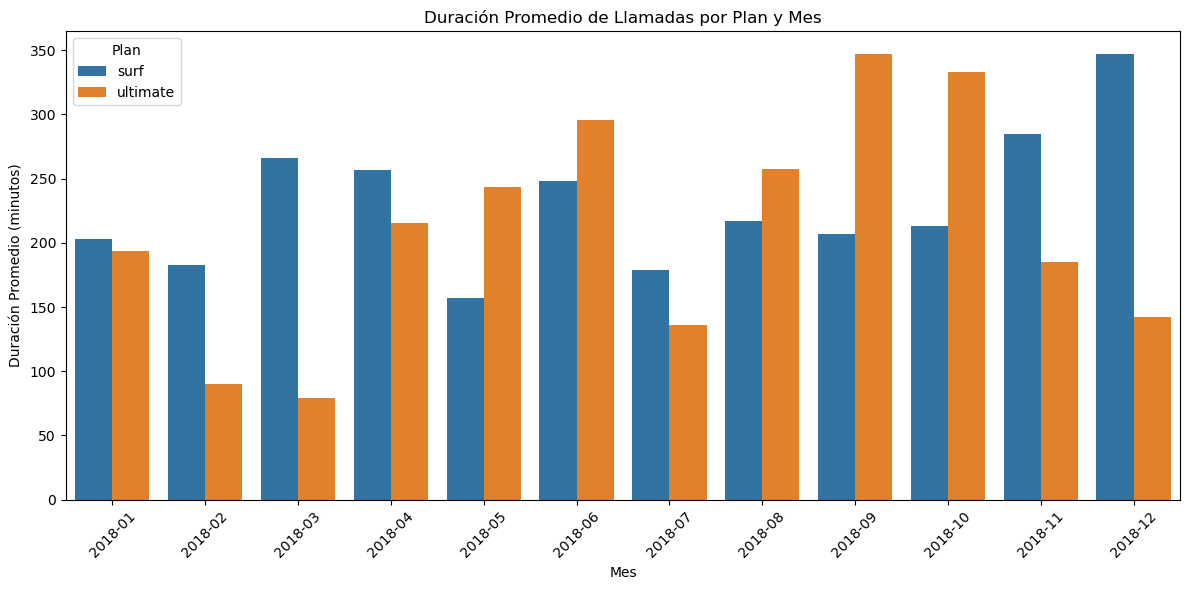

In [93]:
df_calls_avg_duration = df_combined.groupby(['plan', 'month'])['duration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_calls_avg_duration, x='month', y='duration', hue='plan')

plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio (minutos)')
plt.xticks(rotation=45) 
plt.legend(title='Plan', loc='upper left')

plt.tight_layout()
plt.show()

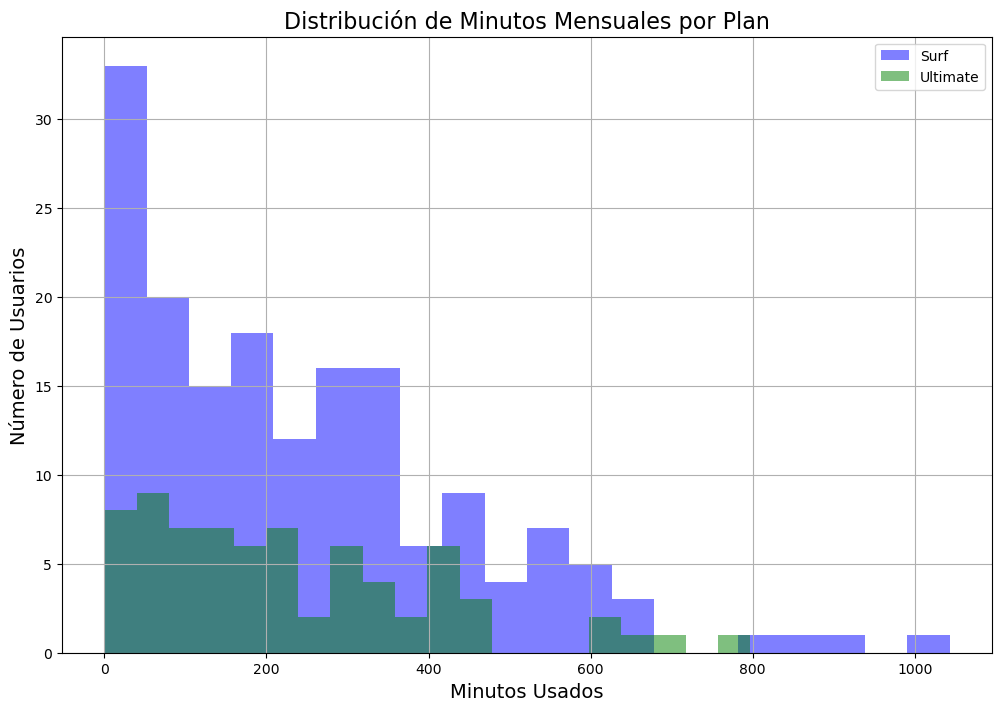

In [94]:
surf_users = df_combined[df_combined['plan'] == 'surf']
ultimate_users = df_combined[df_combined['plan'] == 'ultimate']

plt.figure(figsize=(12, 8))

plt.hist(surf_users['duration'], bins=20, alpha=0.5, label='Surf', color='blue')
plt.hist(ultimate_users['duration'], bins=20, alpha=0.5, label='Ultimate', color='green')

plt.title('Distribución de Minutos Mensuales por Plan', fontsize=16)
plt.xlabel('Minutos Usados', fontsize=14)
plt.ylabel('Número de Usuarios', fontsize=14)
plt.legend()


plt.grid(True)
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [95]:
mean_duration = df_combined['duration'].mean()
variance_duration = df_combined['duration'].var()
print(df_combined['duration'].describe())
print()
print(f"Media de la duración de llamadas en total: {mean_duration:.2f} minutos")
print(f"Varianza de la duración de llamadas en total: {variance_duration:.2f} minutos")

count     240.000000
mean      240.579167
std       195.120695
min         0.000000
25%        82.000000
50%       189.500000
75%       347.750000
max      1043.000000
Name: duration, dtype: float64

Media de la duración de llamadas en total: 240.58 minutos
Varianza de la duración de llamadas en total: 38072.09 minutos


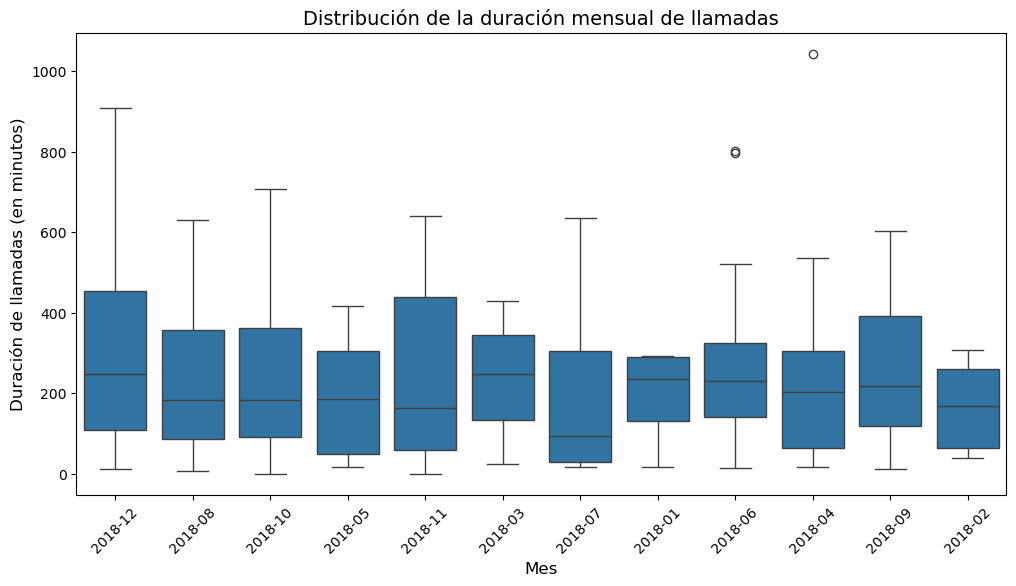

In [96]:
df_filtered = df_combined.dropna(subset=['duration'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='duration', data=df_filtered)

plt.title('Distribución de la duración mensual de llamadas', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Duración de llamadas (en minutos)', fontsize=12)

plt.xticks(rotation=45)

plt.show()

En cuanto a llamadas se observa que el mes de diciembre es aquel en el que las llamadas tienen mayor duración, debido a la periodicidad de las llamadas, esto tiene sentido. 
Se observa que el mayor número de usuarios utiliza, entre 0 y 200 minutos al mes, aunque hay una gran variación entre usuarios, significando que sería necesario aumentar nuestro numero de datos para poder llegar a una conclusión mas acertada. 
La distribución mensual de las llamadas es similar al el número de minutos mensuales que necesitan los usuarios de cada plan, la mayoría de los usuarios se encuentran en rangos similares, pero existen valores atípicos. 


### Mensajes

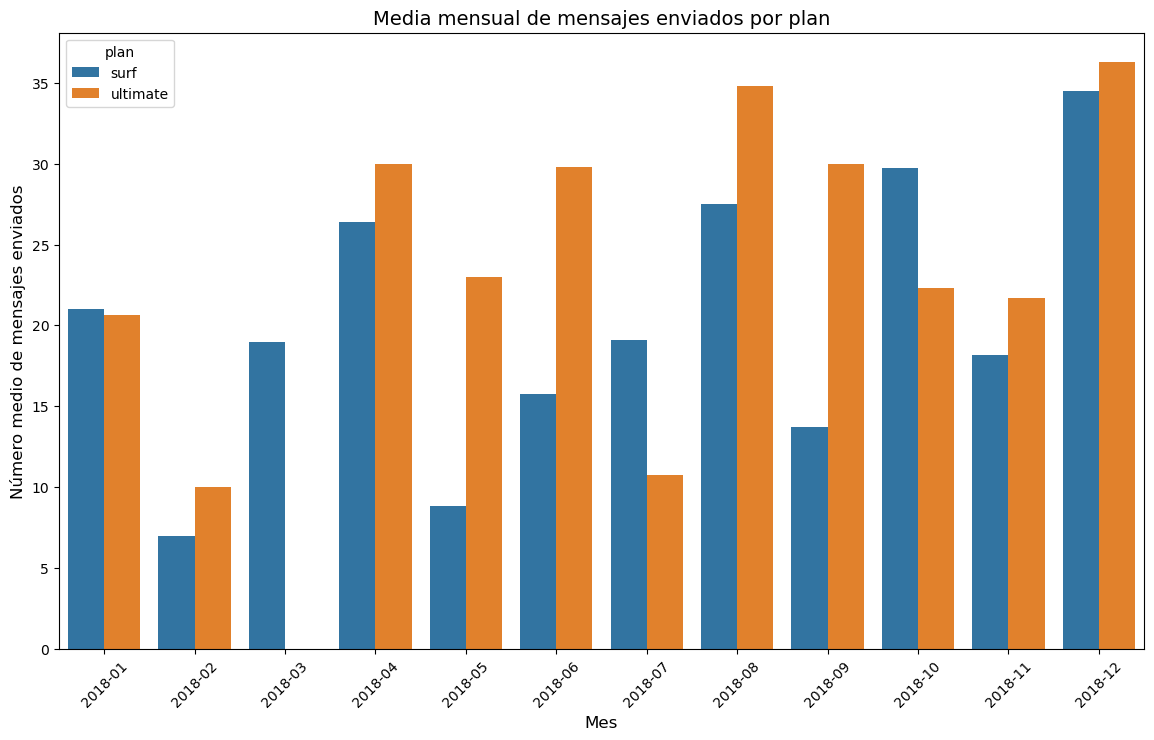

In [97]:
df_filtered = df_combined.dropna(subset=['messages_sent'])
df_monthly_messages = df_filtered.groupby(['month', 'plan'])['messages_sent'].mean().reset_index()
df_monthly_messages['month'] = df_monthly_messages['month'].astype(str)
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='messages_sent', hue='plan', data=df_monthly_messages)


plt.title('Media mensual de mensajes enviados por plan', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número medio de mensajes enviados', fontsize=12)


plt.xticks(rotation=45)


plt.show()

In [98]:
df_filtered = df_combined.dropna(subset=['messages_sent'])
mean_messages_sent = df_filtered['messages_sent'].mean()
variance_messages_sent = df_filtered['messages_sent'].var()

print(df_combined['messages_sent'].describe())
print()
print(f"Media de los mensajes enviados en total: {mean_messages_sent:.2f}")
print(f"Varianza de los mensajes enviados en total: {variance_messages_sent:.2f}")

count    195.000000
mean      24.676923
std       24.757447
min        1.000000
25%        7.000000
50%       17.000000
75%       31.500000
max      125.000000
Name: messages_sent, dtype: float64

Media de los mensajes enviados en total: 24.68
Varianza de los mensajes enviados en total: 612.93


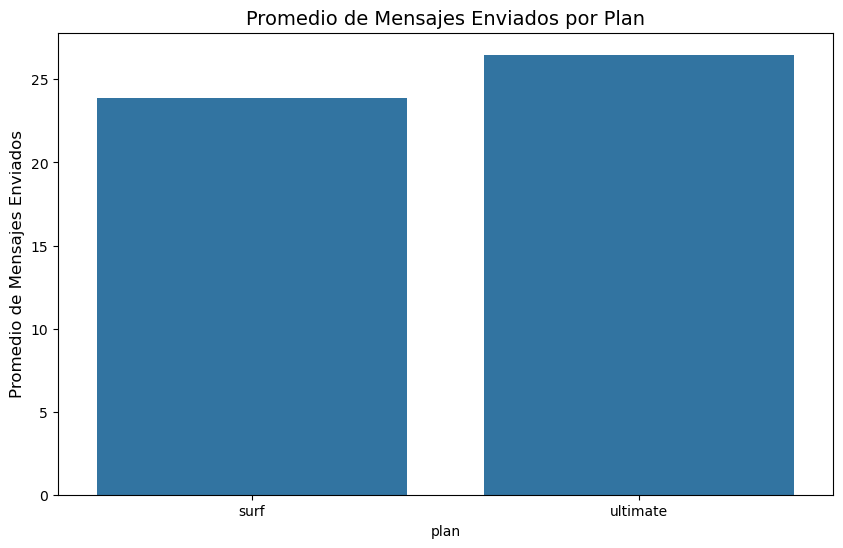

In [99]:
average_messages_by_plan = df_combined.groupby('plan')['messages_sent'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='plan', y='messages_sent', data=average_messages_by_plan)

plt.title('Promedio de Mensajes Enviados por Plan', fontsize=14)
plt.ylabel('Promedio de Mensajes Enviados', fontsize=12)

plt.show()

Los mensajes se comportan de manera similar que las llamadas, el mes de diciembre tiene un mayor número de mensajes, mientras que los usuarios en el plan ultimate, en promedio mandan mas mensajes que los usuarios en el plan surf. 

### Internet

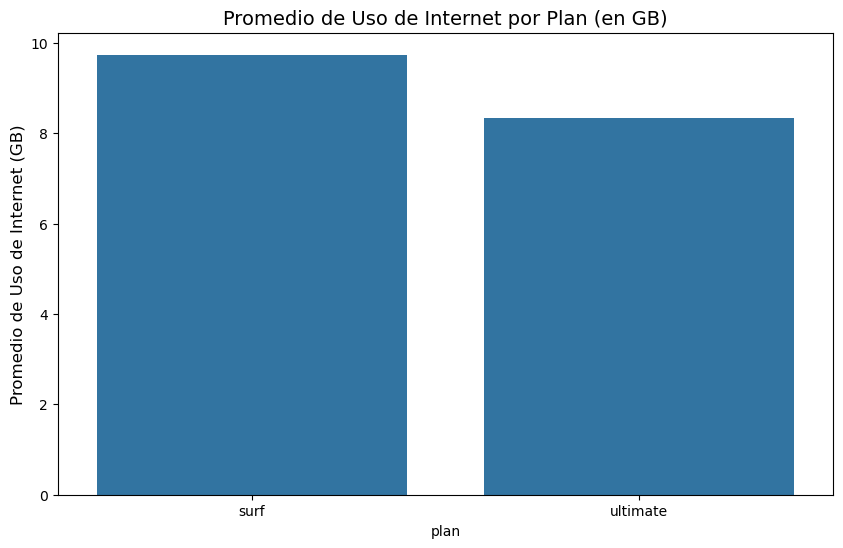

In [100]:
average_internet_usage_by_plan = df_combined.groupby('plan')['gb_used'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='plan', y='gb_used', data=average_internet_usage_by_plan)


plt.title('Promedio de Uso de Internet por Plan (en GB)', fontsize=14)
plt.ylabel('Promedio de Uso de Internet (GB)', fontsize=12)

plt.show()

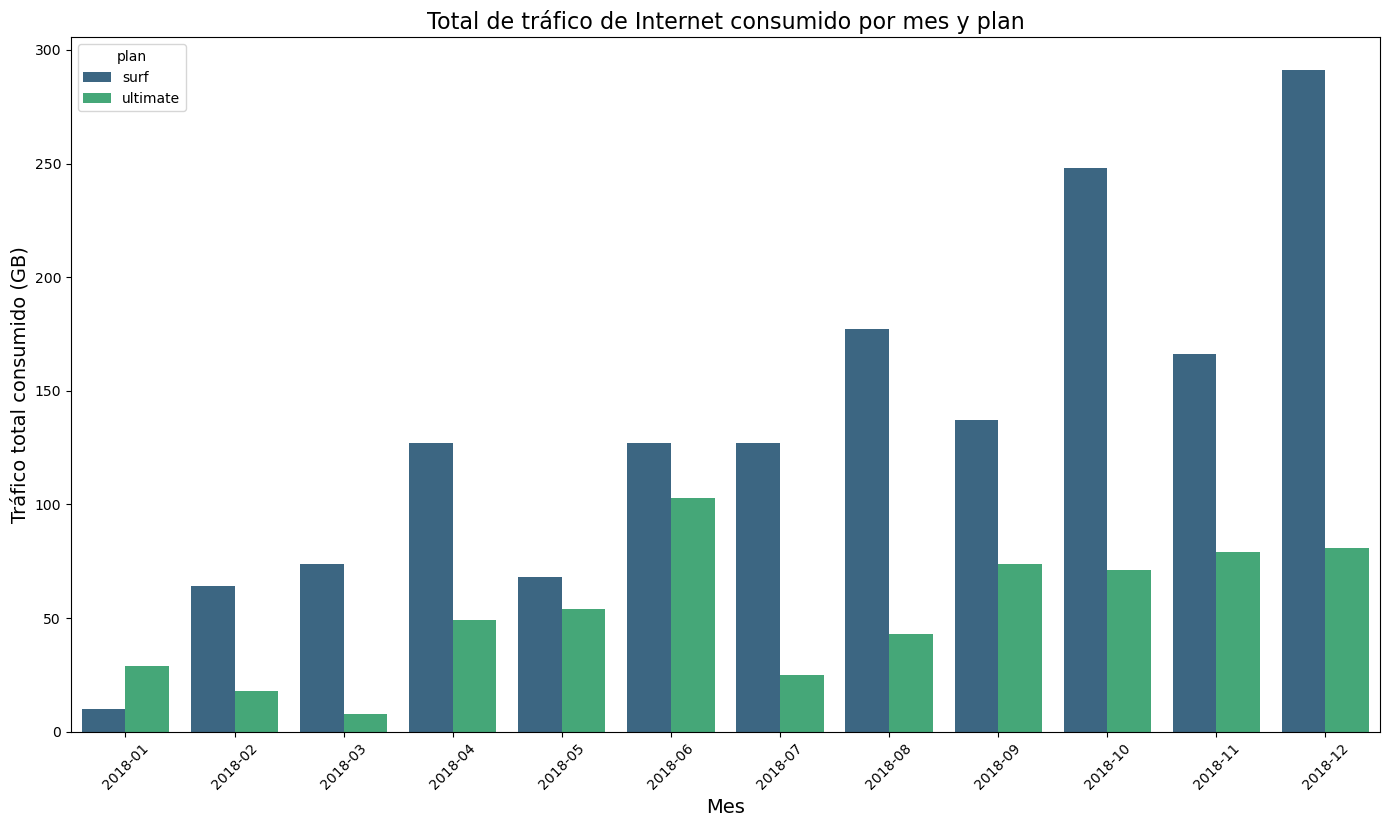

In [101]:
df_filtered_traffic = df_combined.dropna(subset=['gb_used'])

total_traffic_by_month_plan = df_filtered_traffic.groupby(['month', 'plan'])['gb_used'].sum().reset_index()

plt.figure(figsize=(14, 8))  
sns.barplot(x='month', y='gb_used', hue='plan', data=total_traffic_by_month_plan, palette='viridis')

plt.title('Total de tráfico de Internet consumido por mes y plan', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Tráfico total consumido (GB)', fontsize=14)

plt.tight_layout()
plt.xticks(rotation=45) 
plt.show()

In [102]:
df_filtered_traffic = df_combined.dropna(subset=['gb_used'])
print(df_combined['gb_used'].describe())

mean_traffic_by_plan = df_filtered_traffic.groupby('plan')['gb_used'].mean()
variance_traffic_by_plan = df_filtered_traffic.groupby('plan')['gb_used'].var()

print("Media de tráfico de Internet consumido por plan (en GB) en total:")
print(mean_traffic_by_plan)
print("\nVarianza de tráfico de Internet consumido por plan (en GB) en total:")
print(variance_traffic_by_plan)

count    242.000000
mean       9.297521
std        5.952990
min        1.000000
25%        4.000000
50%        9.000000
75%       13.750000
max       27.000000
Name: gb_used, dtype: float64
Media de tráfico de Internet consumido por plan (en GB) en total:
plan
surf        9.734940
ultimate    8.342105
Name: gb_used, dtype: float64

Varianza de tráfico de Internet consumido por plan (en GB) en total:
plan
surf        37.844469
ultimate    29.268070
Name: gb_used, dtype: float64


 En el uso de internet se puede observar como el mes de diciembre es otra vez el mes con mayor uso. También se puede observar que en promedio los usuarios en el plan de surf, utilizan mas internet que aquellos con el plan ultimate. 

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

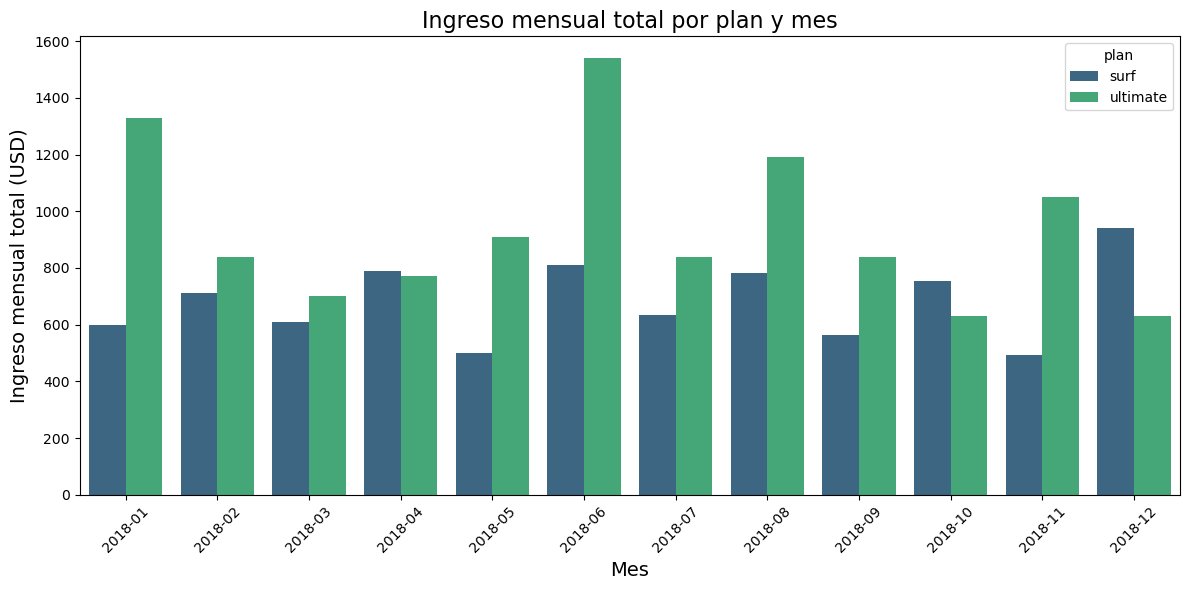

In [103]:
total_revenue_by_plan_month = df_combined.groupby(['month', 'plan'])['monthly_revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='monthly_revenue', hue='plan', data=total_revenue_by_plan_month, palette='viridis')


plt.title('Ingreso mensual total por plan y mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Ingreso mensual total (USD)', fontsize=14)
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

C:\Users\Salva Medina\AppData\Local\Temp\ipykernel_58540\1021214714.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='plan', y='monthly_revenue', data=avg_revenue_by_plan, palette='viridis')


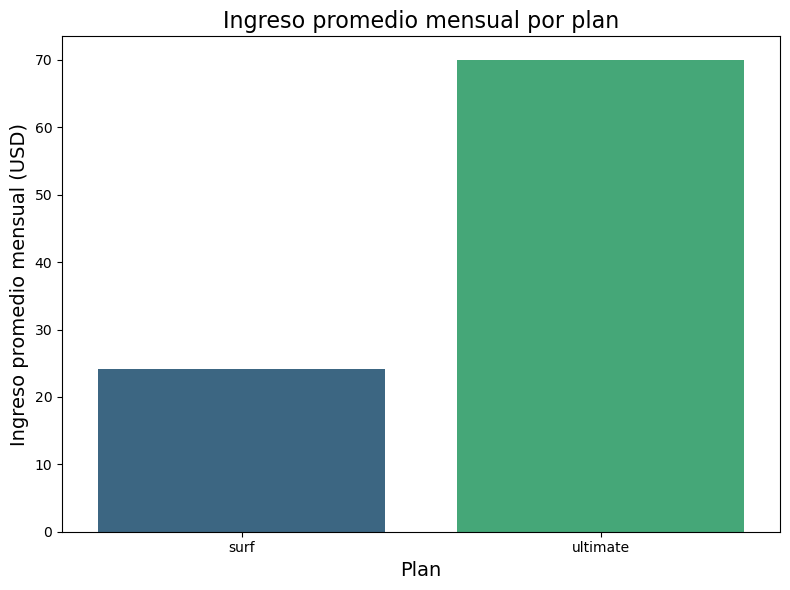

       plan  monthly_revenue
0      surf        24.155988
1  ultimate        70.000000


In [104]:
avg_revenue_by_plan = df_combined.groupby('plan')['monthly_revenue'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='plan', y='monthly_revenue', data=avg_revenue_by_plan, palette='viridis')


plt.title('Ingreso promedio mensual por plan', fontsize=16)
plt.xlabel('Plan', fontsize=14)
plt.ylabel('Ingreso promedio mensual (USD)', fontsize=14)


plt.tight_layout()
plt.show()


print(avg_revenue_by_plan)

In [105]:
revenue_stats_by_plan = df_combined.groupby('plan')['monthly_revenue'].agg(['mean', 'var']).reset_index()
print(df_combined.groupby('plan')['monthly_revenue'].describe())
print()
print(revenue_stats_by_plan)

          count       mean        std   min   25%   50%   75%     max
plan                                                                 
surf      339.0  24.155988  14.580194  20.0  20.0  20.0  20.0  114.05
ultimate  161.0  70.000000   0.000000  70.0  70.0  70.0  70.0   70.00

       plan       mean         var
0      surf  24.155988  212.582044
1  ultimate  70.000000    0.000000


Se puede observar que hay una gran diferencia entre el plan ultimate y surf, especialmente destacando que ultimate nunca paga tarifas extras, lo que significa que los usuarios de este plan no exeden de los limites determinados por el plan, mientras que la variabilidad de los usuarios del plan surf es mayor. 

## Prueba las hipótesis estadísticas

In [106]:
surf_revenue = df_combined[df_combined['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = df_combined[df_combined['plan'] == 'ultimate']['monthly_revenue']

ultimate_revenue_noisy = ultimate_revenue + np.random.normal(0, 0.1, size=ultimate_revenue.shape)

t_stat, p_value = st.ttest_ind(surf_revenue, ultimate_revenue_noisy, equal_var=False)

print(f"Valor p: {p_value}")

alpha = 0.01

if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

Valor p: 1.624246592434739e-177
Rechazamos la hipótesis nula.


In [107]:
ny_nj_users = df_combined[df_combined['city'].str.contains('NY|NJ')]

other_regions_users = df_combined[~df_combined['city'].str.contains('NY|NJ')]

ny_nj_revenue = ny_nj_users['monthly_revenue']
other_regions_revenue = other_regions_users['monthly_revenue']

t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

print(f"Valor p: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")


Valor p: 0.4578855702966439
No rechazamos la hipótesis nula.


## Conclusión general

El plan Ultimate tiene un ingreso constante de $70 por mes, ya que el pago mensual cubre todos los servicios que el usuario necesita, y no recurre a cargos adicionales. Todos los usuarios de este plan tienen exactamente el mismo ingreso mensual, lo que explica por qué la desviación estándar es 0.
En plan Surf, los usuarios tienen una gran variedad de ingresos, ya que hay cargos adicionales si superan los límites de minutos, mensajes o datos. Esto produce una desviación estándar más alta en los ingresos, ya que los cargos extra varían dependiendo del uso de cada usuario
